## Training XGboost regression model

In [1]:
import pandas as pd
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in all merged csv data files
path = r'../data/curated/merged_dataset/'
all_files = glob.glob(os.path.join(path , "*.csv"))

# merge all data of different years
li = []

for filename in sorted(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

merged_df = pd.concat(li, axis=0, ignore_index=True)
merged_df.drop(['address', 'latitude', 'longitude', 'postcode', 'sa2_2016'], axis=1, inplace=True)
print(len(merged_df['sa2_2021'].unique()))

# get dummy values for categorical attributes, and rename attributes
merged_df.rename({'gdp(USD Millioins)': 'gdp', 'saving_rate(% of GDP)': 'saving_rate'}, axis=1, inplace=True)
merged_df = pd.get_dummies(data=merged_df, columns=['sa2_2021'], prefix='sa2')
merged_df = pd.get_dummies(data=merged_df, columns=['residence_type'], prefix='resiType') 
merged_df = pd.get_dummies(data=merged_df, columns=['nbed'], prefix='nbed')
merged_df = pd.get_dummies(data=merged_df, columns=['nbath'], prefix='nbath')
merged_df = pd.get_dummies(data=merged_df, columns=['ncar'], prefix='ncar')
merged_df.dropna(inplace=True)

merged_df    

506


,year,min_distance_to_cbd,min_distance_to_park,min_distance_to_prim,min_distance_to_second,min_distance_to_train,min_distance_to_hosp,min_distance_to_poli,min_distance_to_shop,weekly_rent,...,ncar_0,ncar_1,ncar_2,ncar_3,ncar_4,ncar_5,ncar_6,ncar_7,ncar_8,ncar_9
0,2013,227.97163,23.16035,7.35747,16.96507,35.56825,21.35025,22.04660,9.35209,300.0,...,1,0,0,0,0,0,0,0,0,0
1,2013,223.66084,5.71742,6.50536,6.76794,7.54355,7.42972,6.28177,9.35209,215.0,...,1,0,0,0,0,0,0,0,0,0
2,2013,243.25680,5.11222,0.20027,36.72106,50.85341,36.63541,0.08478,9.35209,175.0,...,1,0,0,0,0,0,0,0,0,0
3,2013,140.35827,78.32509,10.66523,11.91899,11.26906,177.44731,84.47341,9.35209,350.0,...,1,0,0,0,0,0,0,0,0,0
4,2013,13.86135,0.93250,1.32931,3.49174,2.20800,177.44731,84.47341,3.96501,275.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172030,2022,293.28053,0.56012,1.21809,114.77016,90.08591,140.56888,74.35608,13.64920,265.0,...,0,1,0,0,0,0,0,0,0,0
172031,2022,258.29111,3.49087,5.08707,3.60570,8.37185,2.60312,74.35608,13.64920,500.0,...,0,0,1,0,0,0,0,0,0,0
172032,2022,9.47077,2.45011,1.33931,1.62322,3.63291,140.56888,74.35608,1.97636,750.0,...,0,1,0,0,0,0,0,0,0,0
172033,2022,1.84933,0.65199,1.10438,1.27940,1.87840,140.56888,74.35608,13.64920,409.0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
# seperate predictors and response variables
y = merged_df['weekly_rent']
y = np.log(y)
X =  merged_df.loc[:, merged_df.columns != 'weekly_rent']

In [4]:
# holdout method to split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [5]:
# build XGBoost regression model
# https://machinelearningmastery.com/xgboost-for-regression/
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

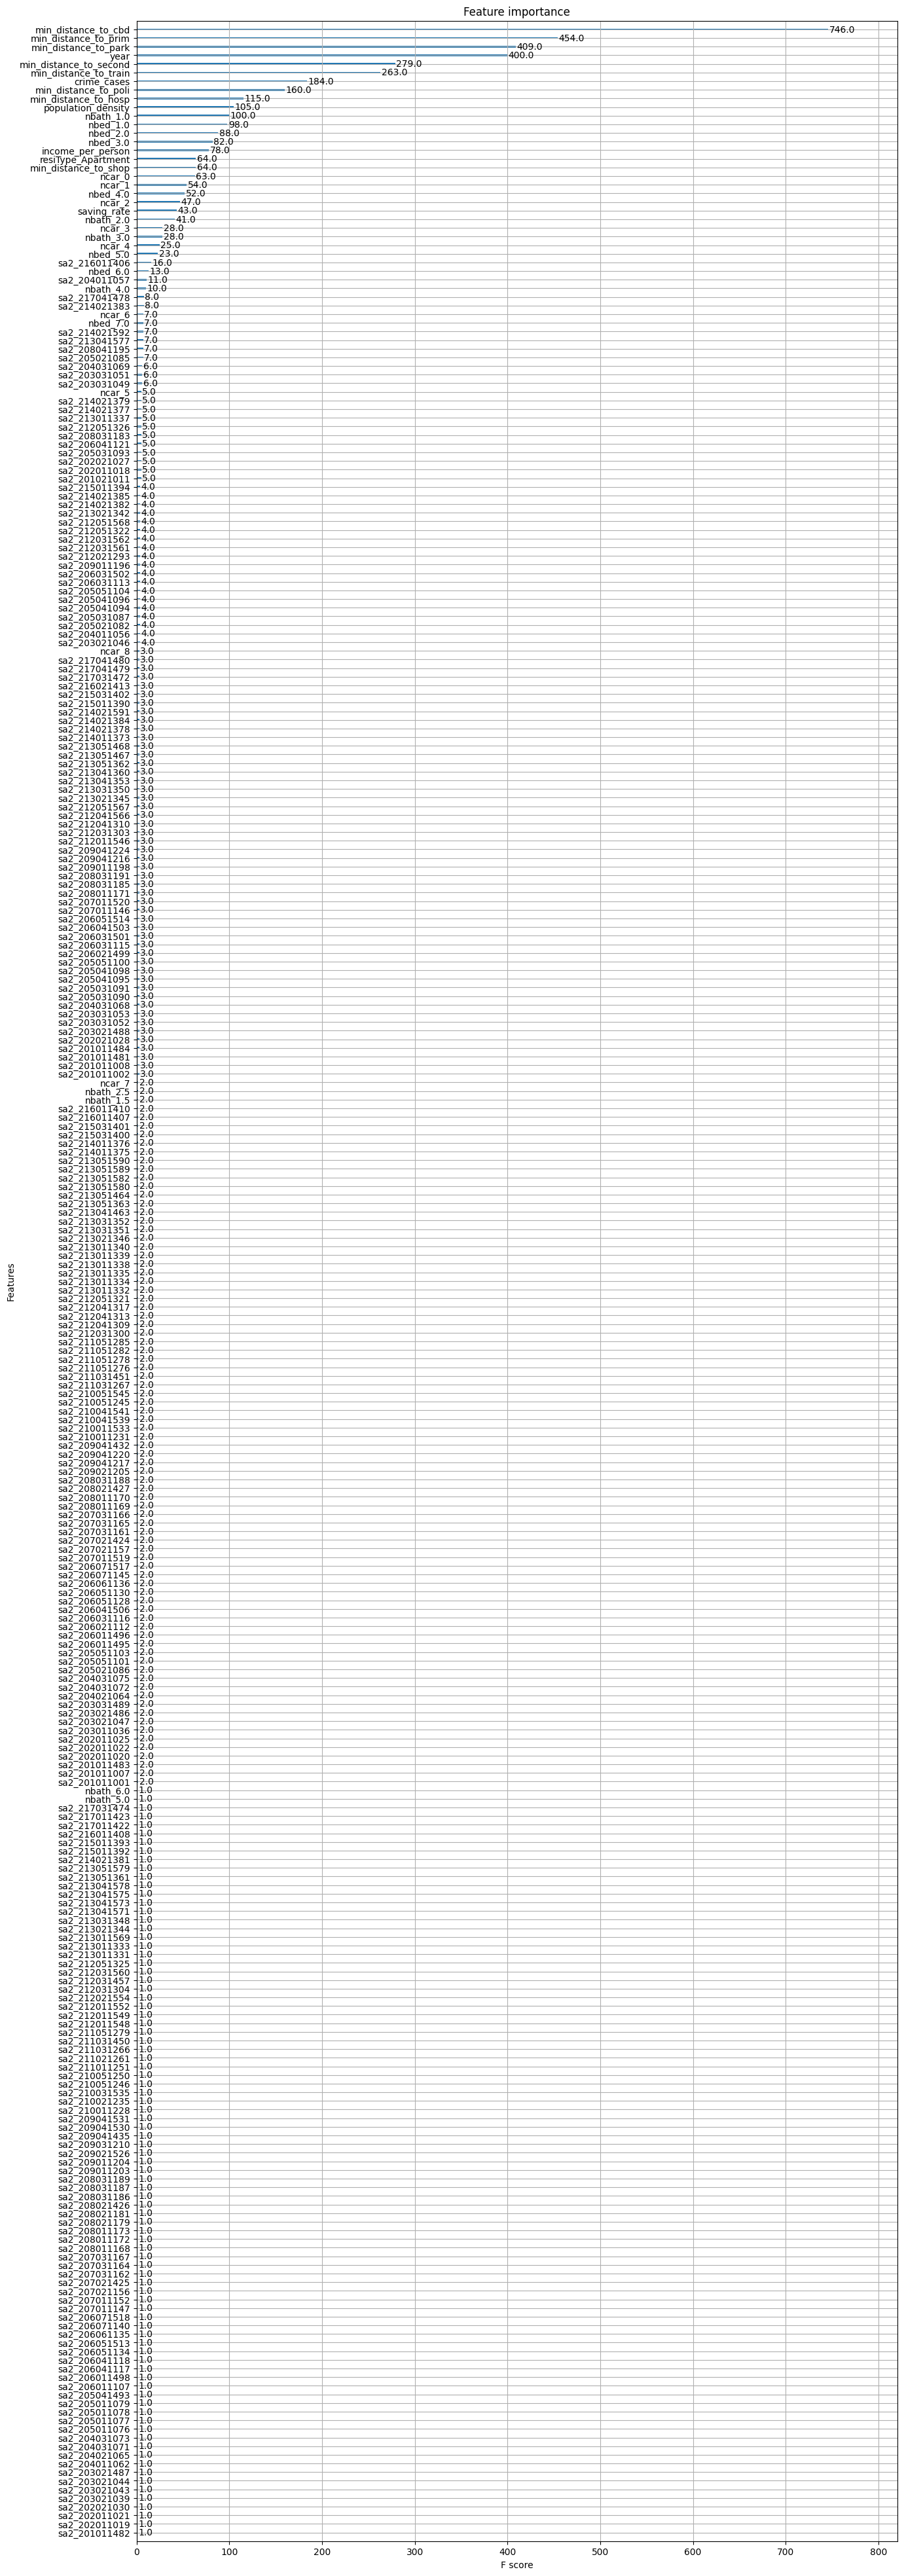

In [6]:
# plot feature importance graph
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig = plt.figure(figsize=(15, 50))
ax = fig.add_subplot(1, 1, 1)

plot_importance(model, ax=ax)
plt.show()

In [11]:
# calculate the training R-square of the XGBoost regression model
print('Accuracy of xgboost regression model on test set: {:.3f}'.format(model.score(X_train, y_train)))

Accuracy of xgboost regression model on test set: 0.718


In [12]:
# calculate the testing R-square of the XGBoost regression model
print('Accuracy of xgboost regression model on test set: {:.3f}'.format(model.score(X_test, y_test)))

Accuracy of xgboost regression model on test set: 0.688


## Make prediction for 2023 - 2027

In [8]:
# training the XGboost regression model by all 2013 - 2022 data
model_final = XGBRegressor()
model_final.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [9]:
# create path
new_path = '../data/curated/2023_2027_rental_prediction_xgboost/'

if not os.path.exists(new_path):
    os.makedirs(new_path)

# predicting rent prices for 2023 -  2027
YEARS = [2023, 2024, 2025, 2026, 2027]

for year in YEARS:
    prediction_set = pd.read_csv(f'../data/curated/2023_2027_data/{year}_data.csv')
    prediction = prediction_set.copy()
    prediction_set.rename({'gdp(USD Millioins)': 'gdp', 'saving_rate(% of GDP)': 'saving_rate'}, axis=1, inplace=True)
    prediction_set = pd.get_dummies(data=prediction_set, columns=['sa2_2021'], prefix='sa2')
    prediction_set = pd.get_dummies(data=prediction_set, columns=['residence_type'], prefix='resiType') 
    prediction_set = pd.get_dummies(data=prediction_set, columns=['nbed'], prefix='nbed')
    prediction_set = pd.get_dummies(data=prediction_set, columns=['nbath'], prefix='nbath')
    prediction_set = pd.get_dummies(data=prediction_set, columns=['ncar'], prefix='ncar')
    prediction_set.dropna(inplace=True)

    # add missing sa2 that were present in training but not in testing, assign with 0s
    missing = set(X_train.columns) - set(prediction_set.columns)
    for c in missing:
        prediction_set[c] = 0
    # Ensure the order of column in the test set is in the same order than in train set
    prediction_set = prediction_set[X_train.columns]

    pred_rent = np.exp(model_final.predict(prediction_set))
    #prediction = prediction_set.copy(deep=True)
    prediction['predicted_price'] = pred_rent
    prediction.to_csv(f'../data/curated/2023_2027_rental_prediction_xgboost/{year}_rental.csv', index=False)